In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import statsmodels.api as sm

In [4]:
homes = pd.read_csv("data/homes.csv")
homes.head()

,Sell,"""List""","""Living""","""Rooms""","""Beds""","""Baths""","""Age""","""Acres""","""Taxes"""
0,142,160,28,10,5,3,60,0.28,3167
1,175,180,18,8,4,1,12,0.43,4033
2,129,132,13,6,3,1,41,0.33,1471
3,138,140,17,7,3,1,22,0.46,3204
4,232,240,25,8,4,3,5,2.05,3613


This dataset is made up of 9 different variables that make up the elements of a home that factor in to its price. 

<Axes: xlabel='Sell', ylabel='Density'>

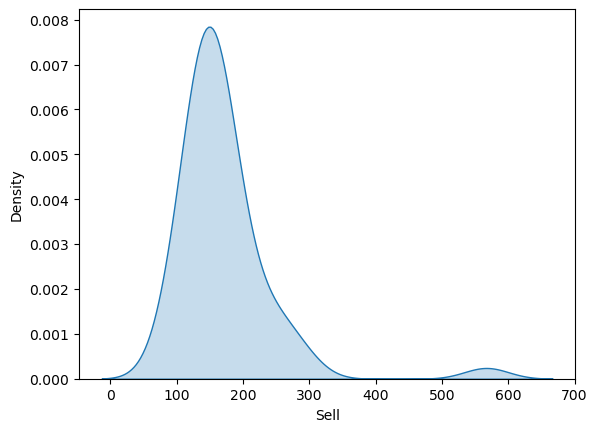

In [6]:
sb.kdeplot(homes.Sell, fill=True)

This shows the range of prices that homes are being sold for. It looks like there are some outliers at the end making this graph skew right. Without these outliers, the data would be normally distributed. 

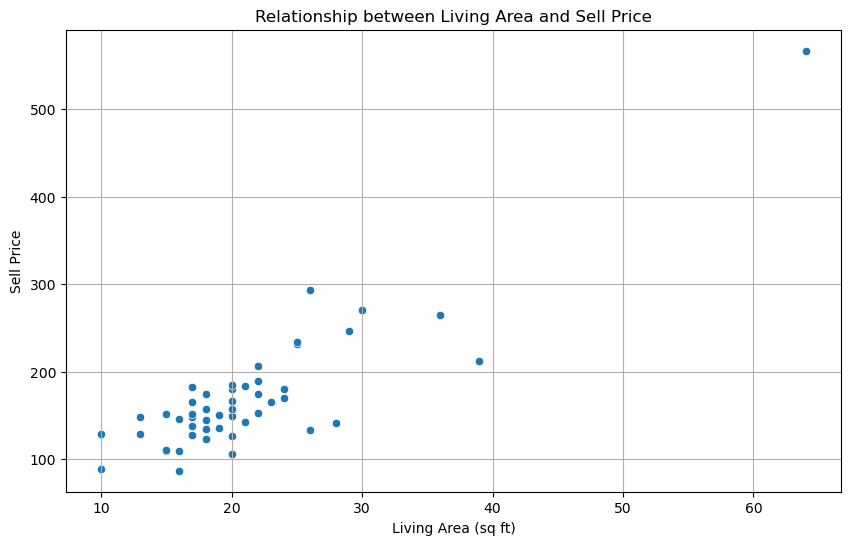

In [46]:
plt.figure(figsize=(10, 6))
sb.scatterplot(x='"Living"', y='Sell', data=homes)
plt.title('Relationship between Living Area and Sell Price')
plt.xlabel('Living Area (sq ft)')
plt.ylabel('Sell Price')
plt.grid(True)
plt.show()

The general trend of the scatterplot shows that as living area increases so does the sell price. 

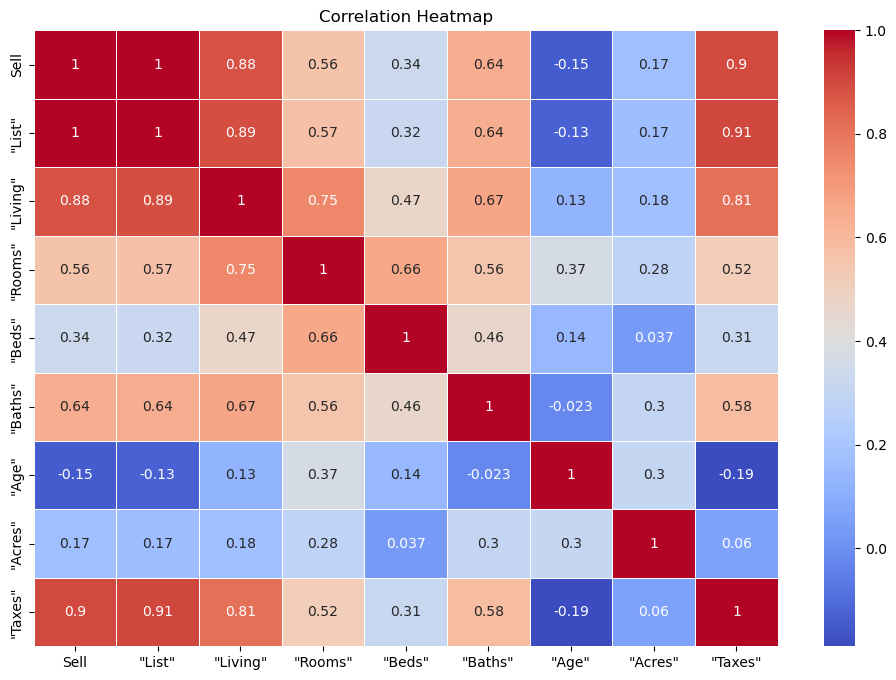

In [40]:
plt.figure(figsize=(12, 8))
correlation_matrix = homes.corr()
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

This graph shows the correlation between each variable in the dataset. The most correlation is between living area and price. 

In [48]:
# Define the independent variable (Taxes) and dependent variable (Sell)
X = homes['"Taxes"']
y = homes['Sell']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Display the output from the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Sell   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     203.1
Date:                Tue, 04 Mar 2025   Prob (F-statistic):           7.22e-19
Time:                        10:47:29   Log-Likelihood:                -243.44
No. Observations:                  50   AIC:                             490.9
Df Residuals:                      48   BIC:                             494.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8719     11.691      1.443      0.1

This model had a very high r-squared value and a very low p-value so I do think that taxes is a good predictor of sell price.

In [50]:
# Define the independent variable (Taxes) and dependent variable (Sell)
X = homes['"Rooms"']
y = homes['Sell']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Display the output from the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Sell   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     21.98
Date:                Tue, 04 Mar 2025   Prob (F-statistic):           2.31e-05
Time:                        10:50:40   Log-Likelihood:                -275.37
No. Observations:                  50   AIC:                             554.7
Df Residuals:                      48   BIC:                             558.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -85.5335     55.258     -1.548      0.1

The first model with taxes as the variable was a much better model. When I tried rooms as the varibable